# 12wk-1: 마코프체인 (10)

최규빈  
2023-05-18

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-w6PeAXdc4YcGTb7M_67Wog>

# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# 지난시간

`-` 수학: 어떠한 집합 $E$에서 equivalence relation $\sim$을 정의할 수
있다면, 집합 $E$의 모든 원소는 $\sim$를 기준으로 분해할 수 있다. 즉
아래를 만족하는 $E_1,E_2,E_3,\dots$ 이 존재한다.

$$E = \uplus_{k=1}^{\infty} E_k$$

단 여기에서 $E_1,E_2,E_3,\dots$ 는 서로소이다.

`-` 통계: 확률변수열 $\{X_t\}$가 HMC라고 하고, $E$를 $\{X_t\}$가
정의되는 상태공간이라고 하자. 기호 $\leftrightarrow$는 $E$에서 정의된
euivalence relation이 된다. 따라서 집합 $E$의 원소는 $\leftrightarrow$를
기준으로 아래와 같이 나눌 수 있다.

$$E = \uplus_{k=1}^{\infty} E_k$$

단 여기에서 $E_1,E_2,E_3,\dots$ 는 서로소이다.

`-` 의미($\star\star\star$)

1.  IRR 하지 않은 마코프체인은 IRR 한 마코프체인으로 분해하여 생각할 수
    있다.
2.  앞으로 마코프체인에 대한 성질을 연구할때 IRR 은 그냥 가정해도
    무방하다.

`-` 예시1: 아래와 같은 전이행렬을 고려하자.

In [2]:
P = np.array([[1,0],
              [0,1]])
P

**해석1**: 모든 분포가 정상분포라고 해석

**해석2:** 전체마코프체인을 쪼개서 (1) 상태0에만 머무는 마코프체인, (2)
상태1에만 머무는 마코프체인으로 나누어 생각하고 각각에 대한 정상분포가
1이라고 해석.

`-` 예시2: 아래와 같은 전이행렬을 고려하자.

In [3]:
P = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,0,1],
              [0,0,1,0]])
P

**해석:** 전체마코프체인을 쪼개서 (1) 상태0에만 머무는 마코프체인, (2)
상태1에만 머무는 마코프체인 (3) 상태 2,3을 셔플하는 마코프체인으로
생각하자. 즉 상태공간을 아래와 같이 분리하자.

$$E = E_1 \uplus E_2 \uplus E_3 = \{0\} \uplus \{1\} \uplus \{2,3\}$$

각 상태공간에 대응하는 마코프체인의 정상분포를
${\boldsymbol \pi}_1^\top,{\boldsymbol \pi}_2^\top,{\boldsymbol \pi}_3^\top$
이라고 하자. 전체 정상분포 ${\boldsymbol \pi}$는 아래를 만족하는 어떠한
분포라도 무관하다.

$${\boldsymbol \pi} = a{\boldsymbol \pi}_1+b{\boldsymbol \pi}_2+c{\boldsymbol \pi}_3.$$

단, 여기에서 $a+b+c=1$ 이고 $a,b,c$는 모두 양수이다.

In [4]:
a= 0.1 
b= 0.5
c= 1-a-b 
π = np.array([a,b,0.5*c, 0.5*c]).reshape(4,1) 
π.T @ P, π.T 

# 예비학습

## 나그네

`-` 나그네 (박목월)

    강나루 건너서
    밀밭 길을

    구름에 달 가듯이
    가는 나그네

    길은 외줄기
    南道 삼백리

    술 익는 마을마다
    타는 저녁놀

    구름에 달 가듯이
    가는 나그네

`-` 나그네

-   정착 X
-   모든 장소에 일시적(transient)으로만 머뭄
-   다시 돌아올 수는 있는데 금방 다시 감.

`-` 편의상 아래와 같이 생각하자.

-   $E$: 마을의 집합
-   $X_t=i$: $t$시점에 나그네가 마을 $i$에 머무는 event

## 급수의 수렴

`-` $a_n \to 0$ 이라고 해서 $\lim_{n\to\infty} S_n <\infty$ 인건 아니다.

`-` 예시1: $a_n=\frac{1}{2^n}$, 수렴하는 경우

In [5]:
sum([1/2**i for i in range(1,10000)])

`-` 예시2: $a_n = \frac{1}{n}$, 수렴안하는 경우

In [6]:
sum([1/i for i in range(1,10000)])

# nature

## 예제1: 오른쪽으로만 갈래

확률변수열 $\{X_t\}$가 HMC라고 하고, 그 transition matrix ${\bf P}$
(혹은 그 비슷한 것) 가 아래와 같다고 하자.

$${\bf P} = \begin{bmatrix} 
0 & 1 & 0 & 0 & 0 & \dots \\ 
0 & 0 & 1 & 0 & 0 & \dots \\ 
0 & 0 & 0 & 1 & 0 & \dots \\ 
0 & 0 & 0 & 0 & 1 & \dots \\ 
\dots & \dots & \dots & \dots & \dots & \dots 
\end{bmatrix}$$

`-` 체크: 이 예제의 마코프체인은 IRR 하지 않다.

`-` 나이스케이스:
$\bar{\boldsymbol \pi}^\top \overset{T \to \infty}{\longrightarrow} {\bf p}_{\star}^\top = {\boldsymbol \pi}^\top$

`-` 이 예제는 나이스하지 않음 왜? IRR이 아니라서?

-   IRR이 아니라서 나이스하지 않다는 것은 핑계임.
-   오른쪽으로 갈 확률을 0.99로 수정한다면 IRR 마코프체인이 된다.
    그렇지만 이게 나이스하게 바뀔 것 같지는 않음.

`-` 나이스하지 않은 본질적인 이유

-   상태 $i$에 일시적(transient)으로 머무는 느낌. 거의 나그네 수준임.
-   $\bar{\boldsymbol \pi}^\top \overset{T \to \infty}{\longrightarrow} {\bf p}_{\star}^\top = {\boldsymbol \pi}^\top$
    이와 같은 논리전개를 쓰려면 일단 $\{X_t\}$가 특정상태를 무한번
    방문해야 가능

`-` FINITE case

-   IRR은 가정할 수 있음.
-   IRR을 가정한다면, 모든 마을에 대해서 나그네가 반복적으로 돌아오는
    느낌이 있음.

`-` 깨달음.

-   FINITE 인 경우는 IRR 이기만 하면 “반복적으로 마을방문” 이
    보장되었다.
-   그런데 INFINITE 한 경우는 IRR 이어도 “반복적으로 마을방문” 이
    보장되지 않는다.

> IRR 조건이 엄청 대단한 조건인줄 알았는데, 사실 그런게 아니고 (수틀리면
> 그냥 IRR 이라고 가정해도 무방한) 실제로 대단한 조건은 숨어있는
> “반복적으로 마을방문” 이라는 조건임.

`-` **가짜정의:** HMC $\{X_t\}$가 (1) IRR (2) PR (3) AP 조건을
만족한다면 $\{X_t\}$를 에르고딕 마코프체인이라고 부른다. 여기에서 PR은
positive recurrent의 약자이며 “반복적으로 마을을 방문한다”의 의미를
가지고 있다.

## Reccurent, Transient

`-` **대안정의**: $\{X_t\}$가 상태공간 $E$에서 정의된 HMC 라고 하자.
만약에 상태 $i \in E$ 가 아래의 식을 만족한다면

$$\sum_{t=0}^{\infty} p_{ii}^{(t)}= \infty$$

$i$는 recurrent 하다고 표현하고, 그렇지 않으면 $i$는 transient 하다고
표현한다.

## 예제2: reflecting random walk

확률변수열 $\{X_t\}$가 HMC라고 하고, 그 transition matrix ${\bf P}$
(혹은 그 비슷한 것) 가 아래와 같다고 하자.

$${\bf P} = \begin{bmatrix} 
1-p & p & 0 & 0 & 0 & \dots \\ 
1-p & 0 & p & 0 & 0 & \dots \\ 
0 & 1-p & 0 & p & 0 & \dots \\ 
0 & 0 & 1-p & 0 & p & \dots \\ 
\dots & \dots & \dots & \dots & \dots & \dots 
\end{bmatrix}$$

`-` 체크: 이 마코프체인은 IRR하다.

`-` case1: $p=0.99$ 라고 하자.

In [33]:
p=0.99
P1 = np.array([[i-j == 1 for i in range(1000)] for j in range(1000)])*p
P2 = np.array([[j-i == 1 for i in range(1000)] for j in range(1000)])*(1-p)
P = P1+P2
P[0,0]= 1-p 
P

In [37]:
(np.matrix(P)**10).round(5)

In [8]:
(np.matrix(P)**100).round(5)

**관찰결과**

1.  $p_{00}^{(t)} \to 0$.
2.  $p_{00}^{(t)} \to 0$ 이라고 해서
    $\sum_{t=0}^{\infty} p_{00}^{(t)} < \infty$ 이라고 주장할 순 없음.
    $\sum_{t=0}^{\infty} p_{00}^{(t)} = \infty$ 역시 주장할 수 없음.
3.  $p_{00}^{(t)}$이 0으로 수렴하는 속도가 매우 빠르다면
    $\sum_{t=0}^{\infty} p_{00}^{(t)} < \infty$ 일 것이고 그렇지 않다면
    $\sum_{t=0}^{\infty} p_{00}^{(t)} = \infty$ 일 것임.
4.  이 경우는 $p_{00}^{(t)}$이 빠르게 0으로 수렴하는듯 보이므로 왠지
    $\sum_{t=0}^{\infty} p_{00}^{(t)} < \infty$ 일 것으로 예상가능
5.  상태0은 transient 인 듯 하다. (확신 X)

`-` case2: $p=0.1$ 이라고 하자.

In [25]:
p=0.1
P1 = np.array([[i-j == 1 for i in range(1000)] for j in range(1000)])*p
P2 = np.array([[j-i == 1 for i in range(1000)] for j in range(1000)])*(1-p)
P = P1+P2
P[0,0]= 1-p 
P

In [26]:
(np.matrix(P)**100).round(5)

In [27]:
(np.matrix(P)**1000).round(5)

**관찰결과**

1.  $p_{00}^{(t)} \to 0.88889$.
2.  $\sum_{t=0}^{\infty} p_{00}^{(t)} = \infty$
3.  따라서 상태0은 recurrent!

$p_{00}^{(t)} \to 0.88889$ 이므로
$\sum_{t=0}^{\infty} p_{00}^{(t)} = \infty$ 이다. 따라서 상태 0은
recurrent!

`-` case3: $p=0.5$ 이라고 하자.

In [39]:
p=0.5
P1 = np.array([[i-j == 1 for i in range(1000)] for j in range(1000)])*p
P2 = np.array([[j-i == 1 for i in range(1000)] for j in range(1000)])*(1-p)
P = P1+P2
P[0,0]= 1-p 
P

In [40]:
(np.matrix(P)**1000).round(3)

In [41]:
(np.matrix(P)**100000).round(3)

In [42]:
(np.matrix(P)**10000000).round(3)

**관찰결과**

1.  $p_{00}^{(t)} \to 0$.
2.  그런데 엄청 천천히 0으로 수렴함.
3.  $p_{00}^{(t)}$이 0으로 수렴하는 속도가 매우 빠르다면
    $\sum_{t=0}^{\infty} p_{00}^{(t)} < \infty$ 일 것이고 그렇지 않다면
    $\sum_{t=0}^{\infty} p_{00}^{(t)} = \infty$ 일 것임.
4.  이 경우는 왠지 $\sum_{t=0}^{\infty} p_{00}^{(t)} = \infty$ 일 것
    같음.
5.  그래서 상태 0은 recurrent 인 것 같음.
6.  실제로 그런지 실험해볼까?

***확인: $\sum_{t=0}^{\infty}p_{00}^{(t)}=\infty$ 임을 프로그래밍을
이용하여 근사적으로 체크해보자.***

In [43]:
Pstar = P.copy()
pT = list()
pT.append(Pstar[0,0])
T = 10000
for t in range(T):
    Pstar = Pstar@P
    pT.append(Pstar[0,0])    
np.array(pT).cumsum()

여기에서

-   `pT` = $[p_{00}^{(0)},p_{00}^{(1)},\dots,p_{00}^{(T)}]$
-   `np.array(pT).cumsum()` =
    $[\sum_{t=0}^{0} p_{00}^{(t)},\sum_{t=0}^{1} p_{00}^{(t)},\dots,\sum_{t=0}^{T} p_{00}^{(t)}]$

이다. 마지막의 `np.array(pT).cumsum()`을 시각화하면 아래와 같다.

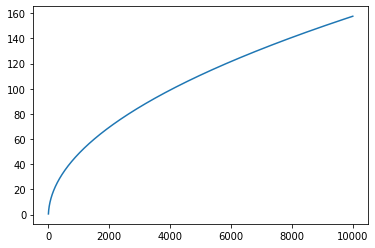

In [44]:
plt.plot(np.array(pT).cumsum())

그래프를 보니 발산할 것 같음

`-` 결론: 계산해보면 (이론적으로든, 시뮬레이션을 이용하든) 이 예제의
경우 아래와 같이 됨을 알 수 있다.

-   경우1: $p>1/2$ $\Rightarrow$
    $\sum_{t=0}^{\infty} p_{00}^{(t)}<\infty$. // state 0 is transient
-   경우2: $p<1/2$ $\Rightarrow$
    $\sum_{t=0}^{\infty}p_{00}^{(t)}=\infty$ with
    $p_{00}^{(t)} \rightarrow c$, $c>0$. // state 0 is positive
    recurrent
-   경우3: $p=1/2$ $\Rightarrow$
    $\sum_{t=0}^{\infty} p_{00}^{(t)}=\infty$ with
    $p_{00}^{(t)} \rightarrow 0$. // state 0 is null recurrent

`-` $p=0.45, p=0.5, p=0.55$ 일 경우 $\sum_{t=0}^{\infty}p_{00}^{(t)}$의
값을 시각화

In [45]:
def calculate_pT(p): 
    P1 = np.array([[i-j == 1 for i in range(1000)] for j in range(1000)])*p
    P2 = np.array([[j-i == 1 for i in range(1000)] for j in range(1000)])*(1-p)
    P = P1+P2
    P[0,0]= 1-p 
    
    Pstar = P.copy()
    pT = list()
    pT.append(Pstar[0,0])
    for t in range(1000):
        Pstar = Pstar@P
        pT.append(Pstar[0,0])    
    return np.array(pT)

In [46]:
case1 = calculate_pT(0.55)
case2 = calculate_pT(0.45)
case3 = calculate_pT(0.50)

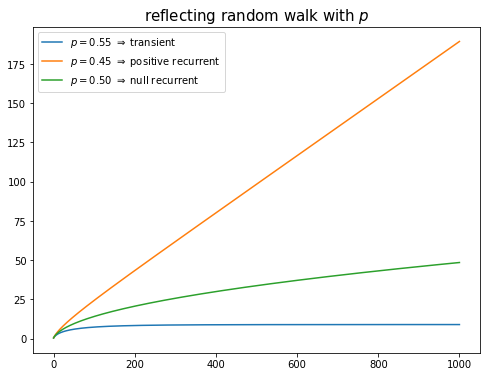

In [58]:
fig = plt.figure(figsize=(8,6))
plt.plot(case1.cumsum(),label=r'$p=0.55$ $\Rightarrow$ transient', color='C0')
plt.plot(case2.cumsum(),label=r'$p=0.45$ $\Rightarrow$ positive recurrent', color='C1')
plt.plot(case3.cumsum(),label=r'$p=0.50$ $\Rightarrow$ null recurrent', color='C2')
plt.title('reflecting random walk with $p$',size=15)
plt.legend()